Exam June 2024, 1.3

In [1]:
from sympy import * #import main library and functions
from IPython.display import display, Math, Markdown #this is to make everything look pretty when displaying the equns


# now we will define the symbols used, include anything except the thing that is in d/dt
t,k,f,V1,Cg  = symbols("t,k,f,V1,Cg",positive=True) 

# define Cp as a function which is the differential equation
Cp = symbols('C_p',cls=Function) 


In [6]:
#now we will define the first differential equation
# REMEMBER left side of equation (= is ,) and right side 
deqn1 = Eq(diff(Cp(t),t),k*Cg-f*Cp(t)/V1) # remember that Cp is a function of time so write (t)

print('this is the differential equation that will be solved:')
deqn1

this is the differential equation that will be solved:


Eq(Derivative(C_p(t), t), Cg*k - f*C_p(t)/V1)

In [7]:
# now we will solve for symbolic solution = wiht initial params and conditions
''
init_condit1 = {Cp(0):0} # initial value of the concentration 
par = [(f,1.2),(Cg,0),(V1,15),(k,0.4)] # parameters, substitute the values given

# now we ask python to solve it for us :)
symb_sol = dsolve((deqn1),ics=init_condit1) #
print( 'symbolic solution:')
symb_sol

symbolic solution:


Eq(C_p(t), Cg*V1*k/f - Cg*V1*k*exp(-f*t/V1)/f)

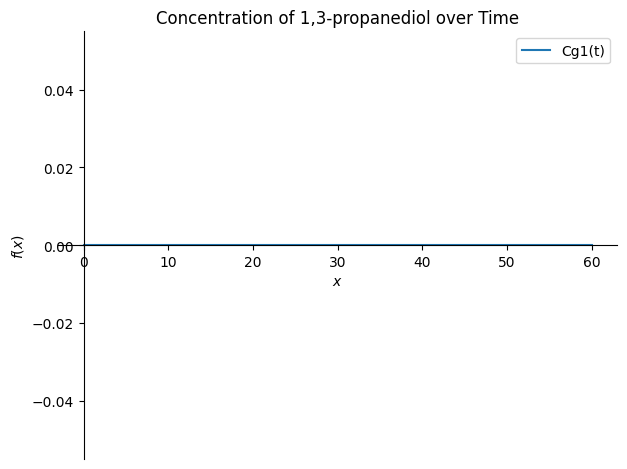

In [11]:
# to provide a figure over a given amount of time:
''
# extracting the original solution with the same parameters
solution = symb_sol.rhs.subs(par) 

#plotting
graphs = plot(solution,(t,0,60),line_colour='blue',label='Cg1(t)', legend=True, show=False)

graphs.title = 'Concentration of 1,3-propanediol over Time'
graphs.show()

NOW ADD LABELS TO THE EUQAITONS SO YOU KNOW WHAT IS WHAT

In [ ]:

def variable_in_part_of_eq(var,part): #var is variable, is it in a part of the equation
    # Read the next few nodes
    split_eq = sum(map(lambda x:x.as_ordered_factors(),part.as_ordered_terms()),start=[]) #break the equation down from terms (a*b to a,b) aka simplify, also start is for defining list, adds together instead of separate values

    # If not at a leaf search further, if at leaf check if var is variable
    if len(split_eq) > 1: #split equation into variables s
        return any(variable_in_part_of_eq
      (var,part) for part in split_eq)
    elif len(split_eq) == 1:
        return split_eq[0] == var #loop and returns the variable
    else:
        raise NotImplementedError()

def to_standard_deqn(deqn,y,x,t):
   
    '''
    Brings a differential equation to standard form
    `tau * dy/dt + y = K * x`
    returns `tau` and `K`
    '''
    # Isolate the x function
    solution = solve(deqn,x) # deqnis defined later, it is
    assert len(solution) == 1 #ensures only one solution

    # collect and separate cofactors for later
    '''
    a * y + b * y => (a+b) * y
    a * y = (dy/dt + y ) => dy/dt + y
    (1/f) = (dy/dt + y ) => dy/dt + y
    '''
    display (solution[0])
    col = collect(solution[0],y) #collects the cofactors, only (1/f) look at notes
    display (col)
    *co_factor,col = col.as_ordered_factors()
    display (col)

    # Split into dy and y
    terms = col.as_ordered_terms()
    assert len(terms) == 2 #ensure eq is split into 2
    _dy,_y = terms if variable_in_part_of_eq(y,terms[1]) else terms[::-1] #variable is in right hand side otherwise turn around the list so y is in correct space
    assert variable_in_part_of_eq(y,_y) #ensure y
    assert variable_in_part_of_eq(diff(y,t),_dy) #ensure dy
    display (_dy,_y)

    # Extract coefficients
    *K_inv,_y = [1]+_y.as_ordered_factors()
    *tau_K_inv,_dy = [1]+_dy.as_ordered_factors()
    assert y == _y #k inv
    assert diff(y,t) == _dy #tau
    display (K_inv,_y)
    display (tau_K_inv,_dy)

    # Combine coefficients
    K_inv     = prod(co_factor+K_inv)
    tau_K_inv = prod(co_factor+tau_K_inv)
    tau = tau_K_inv/K_inv
    K = 1/K_inv

    return tau,K

def from_standard_deqn(y,x,t,tau,K):
    '''
    Constructs differential equation on standard form
    `tau * dy/dt + y = K * x`
    given `tau` and `K`
    '''
    return Eq(tau*diff(y,t) + y, K * x)

deqn_1 = Eq(diff(V1*CA1(t),t), f*CA0   -f*CA1(t)-V1*k*CA1(t))
deqn_2 = Eq(diff(V2*CA2(t),t), f*CA1(t)-f*CA2(t)-V2*k*CA2(t))
tau1,K1 = to_standard_deqn(deqn_1,CA1(t),CA0   ,t) #y value is CA1 and x value is CA0
tau2,K2 = to_standard_deqn(deqn_2,CA2(t),CA1(t),t)
assert tau1 == V1/(f+V1*k)
assert K1 == f/(f+V1*k)
assert tau2 == V2/(f+V2*k)
assert K2 == f/(f+V2*k)
display("Tau",tau1)
display("K",K1)